# Graduate Rotational Internship Program : SPARKS FOUNDATION -TASK - 6

# Author :Akhilesh Mishra

# Predicting-Using Descision Tree Implementation on Iris Dataset
Domain: Data Science and Business Analytics.

Task 6: Create the Decision Tree classifier and visualize it graphically.

Purpose: The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly

# Introduction
A Decision Tree is a type of supervised learning algorithm which uses a tree like structure and is mostly used in classification problems and regression purposes. It is one of the most popular machine learning algorithms.

A decision tree is a structure that includes a root node, branches, and leaf nodes.

Level: Intermediate

# First : Importing All Necessary Libraries :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix  

# Second : Reading Dataset to Jupiter Notebook :

In [2]:
iris = pd.read_csv(r'C:\Users\Akhilesh\Downloads\spark  foundation\6th\Iris.csv', index_col = 0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.4+ KB


In [5]:
iris.shape

(150, 5)

In [6]:
#checking for null values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

There are no missing values in the dataset.

For data visualization Seaborn library is used.
This provides a high-level interface for drawing attractive and informative statistical graphics.

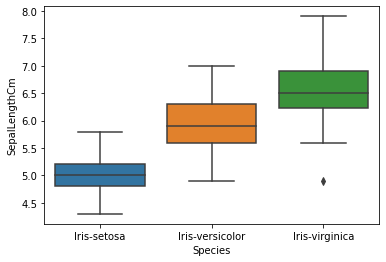

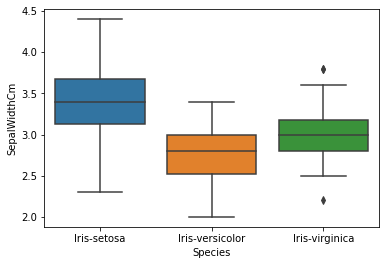

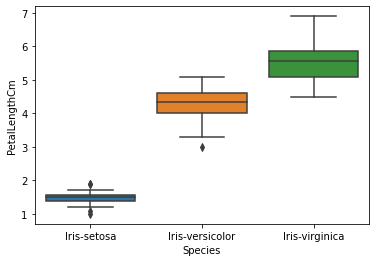

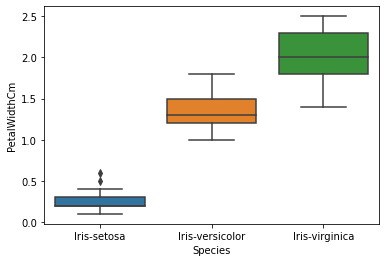

In [8]:
#box plot
sns.boxplot(x='Species',y='SepalLengthCm', data=iris) 
plt.show()
sns.boxplot(x='Species',y='SepalWidthCm', data=iris) 
plt.show()
sns.boxplot(x='Species',y='PetalLengthCm', data=iris) 
plt.show()
sns.boxplot(x='Species',y='PetalWidthCm', data=iris) 
plt.show()

Height of box represents all data between 25th percentile to 75th percentile and that horizontal bar represents maximum range of that data and width of box represents spread of that data in dataset.

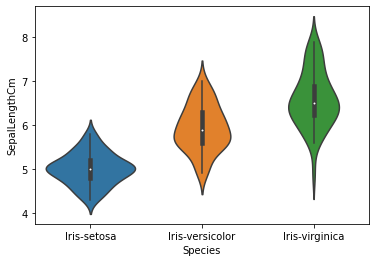

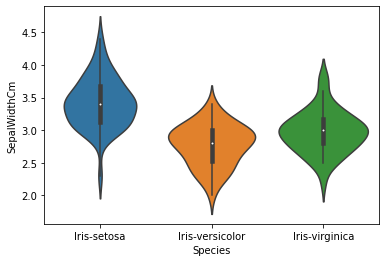

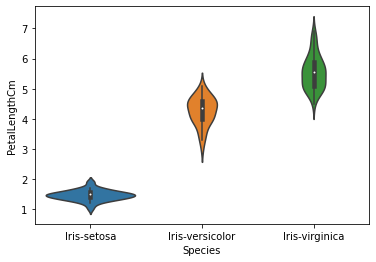

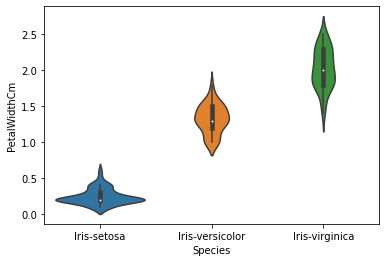

In [9]:
# violin plot
sns.violinplot(x="Species", y = "SepalLengthCm",data = iris,size = 8)
plt.show()
sns.violinplot(x="Species", y = "SepalWidthCm",data = iris,size = 8)
plt.show()
sns.violinplot(x="Species", y = "PetalLengthCm",data = iris,size = 8)
plt.show()
sns.violinplot(x="Species", y = "PetalWidthCm",data = iris,size = 8)
plt.show()

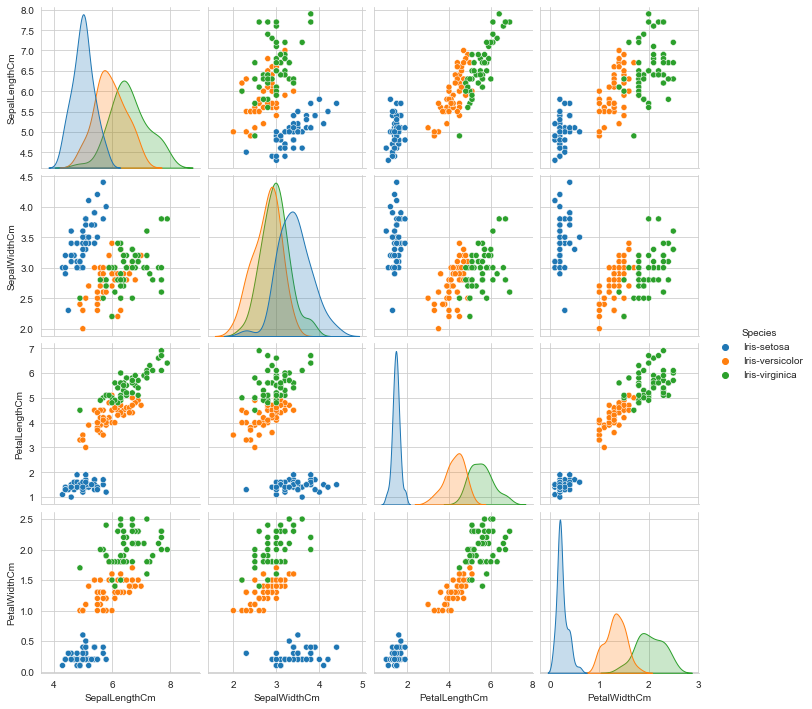

In [10]:
sns.set_style('whitegrid')
# Data Visualisation Step
sns.pairplot(iris,hue ='Species')
# hue - color based on a column name  - in most case it will be Target Columns

# Decision Tree algorithm
A Decision Tree algorithm has a tree-like structure with each internal node representing an attribute test, each branch representing the test result, and each leaf node representing a class mark. Classification rules are represented by the paths from the root node to the leaf node.

Root Node: It is a representative sample of the whole population. This further gets divided into two or more homogeneous sets.

Splitting: It is a process of dividing a node into two or more sub-nodes.

Decision Node: A decision node is formed when a sub-node splits into more sub-nodes.

Leaf/Terminal Node: Nodes that do not split are called Leaf or Terminal nodes.

Pruning: It is the method of removing sub-nodes from a decision node. It is the opposite process of splitting.

Branch/Sub-Tree: A sub-section of an entire tree is called a branch or sub-tree.

Parent and Child Node: A node, which is divided into sub-nodes is called the parent node of sub-nodes where sub-nodes are the children of a parent node.

The above terminology is represented clearly in the following diagram: title

# Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(iris['Species'])
iris['Species']  = encoder.transform(iris['Species'])

In [12]:
X = iris.drop('Species', axis = 1)
y = iris['Species']

# Splitting data into train and test data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

# Implementing Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Prediction and Evaluation

In [15]:
# predict 
pred = clf.predict(X_test)  
confusion_matrix(y_test, pred)

array([[12,  0,  0],
       [ 0, 14,  2],
       [ 0,  2, 15]], dtype=int64)

Confusion matrix is a table that is often used to describe the performance of a classification model or classifier on a set of test data for which the true values are known.

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

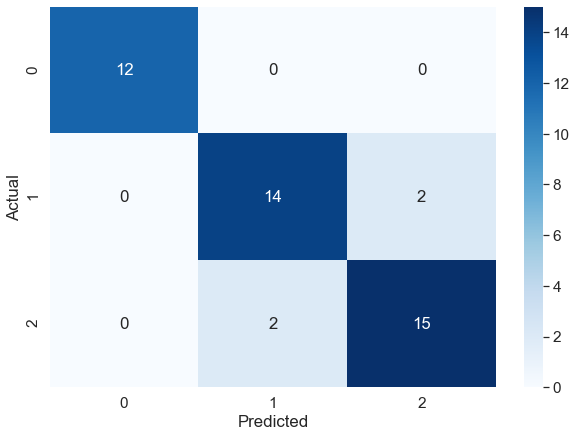

In [16]:
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name= 'Predicted'
plt.figure(figsize=(10,7))
sns.set(font_scale =1.4)
sns.heatmap(df_cm, cmap = "Blues", annot=True) 

The figure above means only two observations has been classifed as false.

In [17]:
print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88        16
           2       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



True Positives (TP) are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.

True Negatives (TN) are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.

False Positives (FP) and False Negatives (FN), these values occur when your actual class contradicts with the predicted class.

FP: When actual class is no and predicted class is yes. FN: When actual class is yes but predicted class is no. Precision or positive predictive value is the fraction of relevant instances among the retrieved instances.

Recall also known as sensitivity is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance.

F1 score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

In [18]:
# important features 
print(clf.feature_importances_)

[0.00954198 0.         0.9651036  0.02535442]


In [19]:
a=pd.DataFrame({'Actual':y_test,'Predicted':pred})
a.head()

,Actual,Predicted
Id,,
150,2,2
85,1,1
41,0,0
67,1,1
107,2,1


Let us visualize the Decision Tree to understand it better.

# Visualizing the Decision Tree.

In [20]:
feature_cols = X.columns
target_cols = list(encoder.classes_)

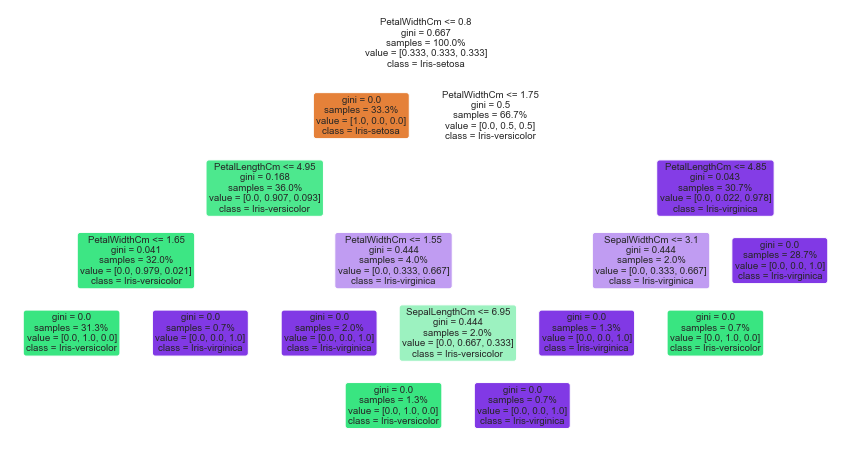

In [21]:
from sklearn import tree

plt.figure(figsize = (15,8))
tree.plot_tree(clf.fit(X, y), feature_names = feature_cols, class_names = target_cols, filled = True,
              precision = 3, proportion = True, rounded = True)
plt.show()

You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.